<a href="https://colab.research.google.com/github/zjkang/machine-learning-coding/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refer [logistic regression coding](https://github.com/alirezadir/Machine-Learning-Interviews/blob/main/src/MLC/notebooks/logistic_regression.ipynb) as code reference.

实现了2个方法
* 标准的logistic regression
* logistic regression with (1) add regularization (2) mini-batch SGD

Refer [here](https://web.stanford.edu/~jurafsky/slp3/5.pdf) detailed logistic regression explanation

For binary classifiction $(X,y), y \in [0,1]$,
* $z = w_1x_1+w_2x_2 + ... + w_nx_n + b$
* $\hat{y} = 1/(1+e^{-z})$
* the loss function for one example should be $loss(y, \hat{y}) = -[ylog\hat{y} + (1-y)log(1-\hat{y})]$
* the gradient is $\frac{\partial l}{\partial w_j} = (\hat{y} - y)x_j$


In [2]:
# method 1: 标准的logistic regression
import numpy as np

class LogisticRegression:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # initialize weights and bias to zeros
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent optimization
        for i in range(self.n_iters):
            # calculate predicted probabilities and cost
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)
            cost = (-1 / n_samples) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

            # calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # calculate predicted probabilities
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        # convert probabilities to binary predictions
        return np.round(y_pred).astype(int)

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

In [3]:
# create sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression()

# train model on sample dataset
lr.fit(X, y)

# make predictions on new data
X_new = np.array([[6, 7], [7, 8]])
y_pred = lr.predict(X_new)

print(y_pred)  # [1, 1]

[1 1]


In [1]:
# method 2: logistic regression with (1) add regularization (2) mini-batch SGD
# note: 感觉mini-batch写的有点问题。n_iters应该等价epochs,对于每一个epoch,mini-batch的时候应该打乱顺序逐个抽取数据.
import numpy as np

class LogisticRegression:

    def __init__(self, learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=32):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.regularization = regularization
        self.reg_strength = reg_strength
        self.batch_size = batch_size
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        n_batches = n_samples // self.batch_size
        for i in range(self.n_iters):
            batch_indices = np.random.choice(n_samples, self.batch_size)
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            z = np.dot(X_batch, self.weights) + self.bias
            y_pred = self._sigmoid(z)
            cost = (-1 / self.batch_size) * np.sum(y_batch * np.log(y_pred) + (1 - y_batch) * np.log(1 - y_pred))
            if self.regularization == 'l2':
                reg_cost = (self.reg_strength / (2 * n_samples)) * np.sum(self.weights ** 2)
                cost += reg_cost
            elif self.regularization == 'l1':
                reg_cost = (self.reg_strength / (2 * n_samples)) * np.sum(np.abs(self.weights))
                cost += reg_cost
            dw = (1 / self.batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
            db = (1 / self.batch_size) * np.sum(y_pred - y_batch)
            if self.regularization == 'l2':
                dw += (self.reg_strength / n_samples) * self.weights
            elif self.regularization == 'l1':
                dw += (self.reg_strength / n_samples) * np.sign(self.weights)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        return np.round(y_pred).astype(int)

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

In [2]:
# create sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression(learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=2)

# train model on sample dataset
lr.fit(X, y)

# make predictions on new data
X_new = np.array([[6, 7], [7, 8]])
y_pred = lr.predict(X_new)

print(y_pred)  # [1, 1]

[1 1]


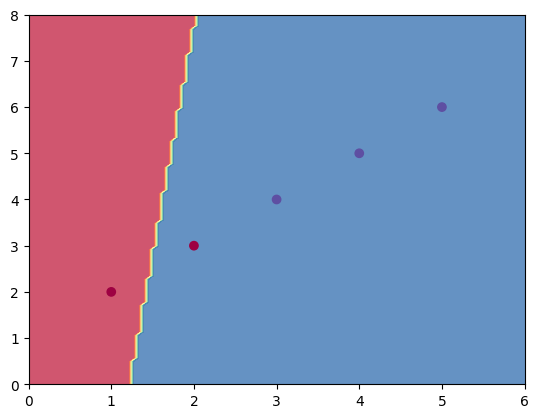

In [6]:
# note:
import matplotlib.pyplot as plt

# create 2D dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression(learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=2)

# train model on dataset
lr.fit(X, y)

# plot decision boundary
x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 8, 100)
xx, yy = np.meshgrid(x1, x2)
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# plot data points
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

plt.show()

In [5]:
# method 3: logistic regression with (1) add regularization (2) mini-batch SGD
import numpy as np

class LogisticRegression:

    def __init__(self, learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=32):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.regularization = regularization
        self.reg_strength = reg_strength
        self.batch_size = batch_size
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        n_batches = n_samples // self.batch_size
        for i in range(self.n_iters):
            indices = np.random.permutation(n_samples) # shffule all samples
            for j in range(0, n_samples, self.batch_size):
                batch_indices = indices[j:j + self.batch_size]
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]
                z = np.dot(X_batch, self.weights) + self.bias
                y_pred = self._sigmoid(z)
                cost = (-1 / self.batch_size) * np.sum(y_batch * np.log(y_pred) + (1 - y_batch) * np.log(1 - y_pred))
                if self.regularization == 'l2':
                    reg_cost = (self.reg_strength / (2 * n_samples)) * np.sum(self.weights ** 2)
                    cost += reg_cost
                elif self.regularization == 'l1':
                    reg_cost = (self.reg_strength / (2 * n_samples)) * np.sum(np.abs(self.weights))
                    cost += reg_cost
                dw = (1 / self.batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
                db = (1 / self.batch_size) * np.sum(y_pred - y_batch)
                if self.regularization == 'l2':
                    dw += (self.reg_strength / n_samples) * self.weights
                elif self.regularization == 'l1':
                    dw += (self.reg_strength / n_samples) * np.sign(self.weights)
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        return np.round(y_pred).astype(int)

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

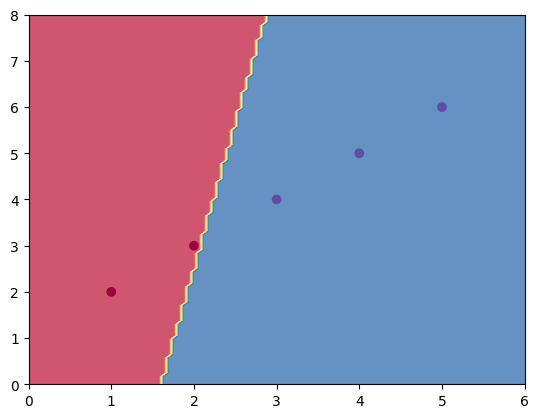

In [6]:
# note:
import matplotlib.pyplot as plt

# create 2D dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression(learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=2)

# train model on dataset
lr.fit(X, y)

# plot decision boundary
x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 8, 100)
xx, yy = np.meshgrid(x1, x2)
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# plot data points
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

plt.show()

[4 5]
